In [1]:
import os
import ipywidgets
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
core_path = os.getcwd()
asteroids_df = pd.read_pickle(os.path.join(core_path, "data/lvl2/", "asteroids.pkl"))

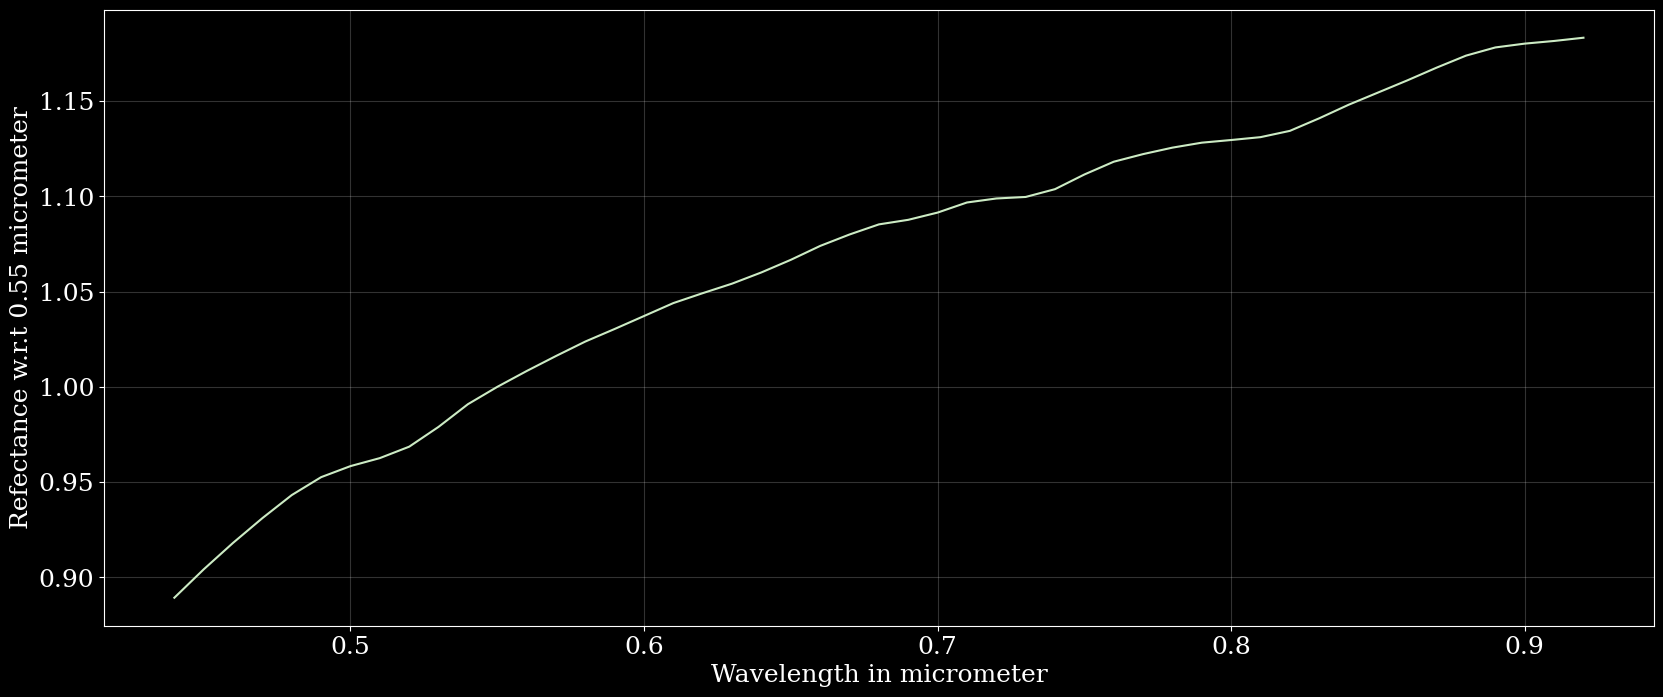

In [3]:
# We took the first Asteroid from the X-Class, and we plotted it, checking how it's reflectance changes w.r.t wavelength.

plt.style.use("dark_background")
plt.rc("font", family="serif", size=18)

plt.figure(figsize=(20,8))

asteroids_filtered_df = asteroids_df.loc[asteroids_df["Main Group"]=="X"]   # Selecting the "X" type from Main Group

plt.plot(asteroids_filtered_df["SpectrumDF"].iloc[0]["Wavelength_in_micron"],   # From SpectrumDF taking Wavelength for [0]th asteroid
         asteroids_filtered_df["SpectrumDF"].iloc[0]["Reflectance_norm550nm"],  # From SpectrumDF taking Reflectance for [0]th asteroid
         color="#ccebc4")

plt.xlabel("Wavelength in micrometer")
plt.ylabel("Refectance w.r.t 0.55 micrometer")
plt.grid(alpha=0.2)

plt.show()

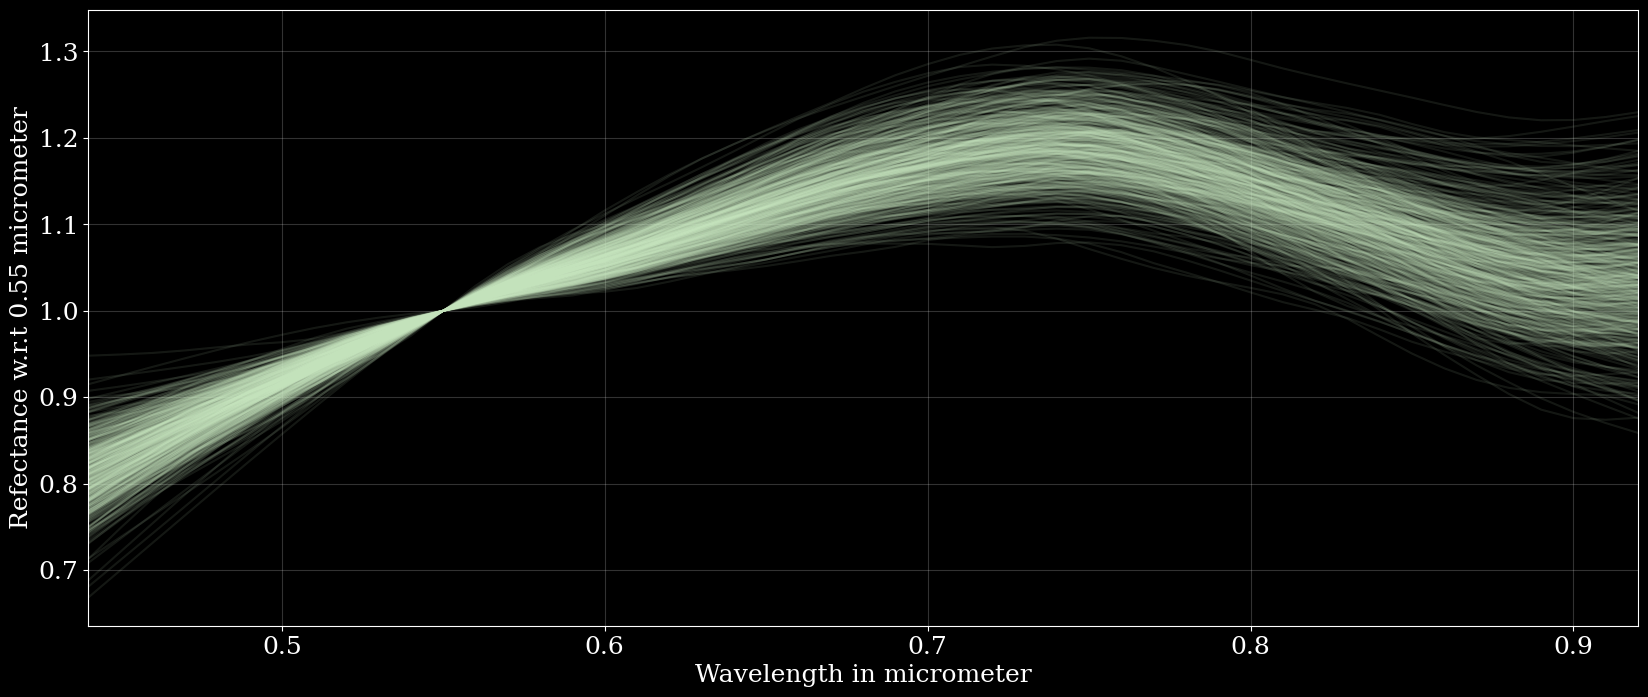

In [4]:
# We took the first Asteroid from the X-Class, and we plotted it, checking how it's reflectance changes w.r.t wavelength.

plt.style.use("dark_background")
plt.rc("font", family="serif", size=18)

plt.figure(figsize=(20,8))

asteroids_filtered_df = asteroids_df.loc[asteroids_df["Main Group"]=="S"]   # Selecting the "X" type from Main Group

no_of_spec = float(len(asteroids_filtered_df))  # no_of_spec is 237 which will be very faint for out alpha
if no_of_spec > 10:
    no_of_spec = 10

for _, row in asteroids_filtered_df.iterrows():

    plt.plot(row["SpectrumDF"]["Wavelength_in_micron"],   # From SpectrumDF taking Wavelength
            row["SpectrumDF"]["Reflectance_norm550nm"],  # From SpectrumDF taking Reflectance
            color="#ccebc4",
            alpha=1.0/no_of_spec)   # alpha should be in range 0-1 only

plt.xlabel("Wavelength in micrometer")
plt.ylabel("Refectance w.r.t 0.55 micrometer")
plt.xlim(0.44, 0.92)
plt.grid(alpha=0.2)

plt.show()

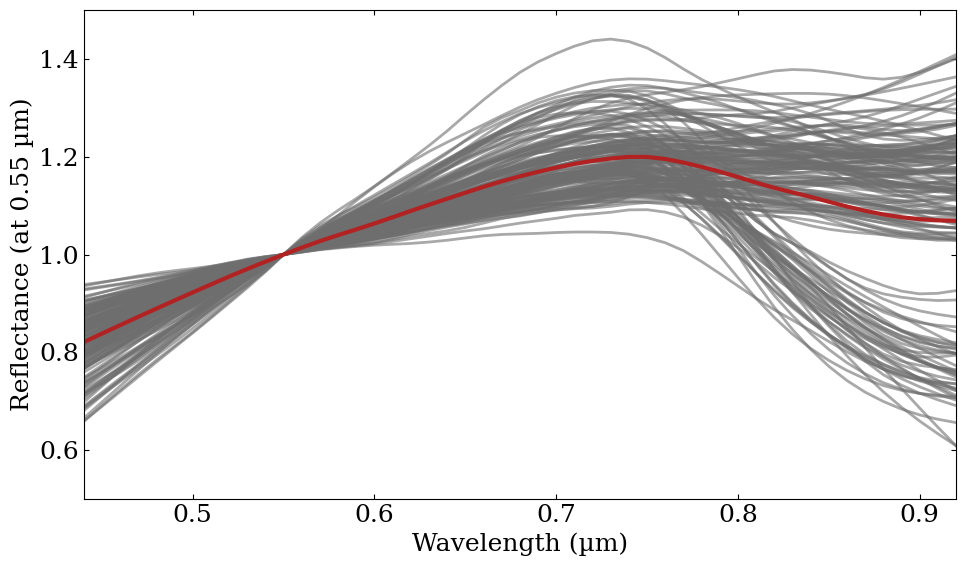

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Styling
# -----------------------------
plt.style.use("default")
plt.rc("font", family="serif", size=18)

fig, ax = plt.subplots(figsize=(10, 6))

# -----------------------------
# Select S-type asteroids
# -----------------------------
asteroids_filtered_df = asteroids_df.loc[
    asteroids_df["Main Group"] == "Other"
]

# -----------------------------
# Collect wavelength and spectra
# -----------------------------
wavelength = asteroids_filtered_df.iloc[0]["SpectrumDF"]["Wavelength_in_micron"].values

spectra = np.array([
    row["SpectrumDF"]["Reflectance_norm550nm"].values
    for _, row in asteroids_filtered_df.iterrows()
])

# -----------------------------
# Plot individual spectra (dark grey, thick)
# -----------------------------
for spec in spectra:
    ax.plot(
        wavelength,
        spec,
        color="#6e6e6e",   # dark grey
        linewidth=2.0,
        alpha=0.6
    )

# -----------------------------
# Plot mean spectrum (red, thicker)
# -----------------------------
mean_spec = spectra.mean(axis=0)

ax.plot(
    wavelength,
    mean_spec,
    color="firebrick",
    linewidth=3.0
)

# -----------------------------
# FIX: set axis limits to DATA RANGE
# -----------------------------
ax.set_xlim(0.44, 0.92)
ax.set_ylim(0.5, 1.5)   # adjust if needed

# -----------------------------
# Axes formatting
# -----------------------------
ax.set_xlabel("Wavelength (µm)")
ax.set_ylabel("Reflectance (at 0.55 µm)")

ax.tick_params(direction="in", top=True, right=True)
ax.grid(False)

# -----------------------------
# Save and show
# -----------------------------
plt.tight_layout()
plt.savefig(
    "Other_type_spectra_darkgray_mean_fixed.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


In [ ]:
top_class_widget = ipywidgets.Dropdown(options = ["Bus Class", "Main Group"])
sub_class_widget = ipywidgets.Dropdown()

def update_sub_class(*args):
    sub_class_widget.options = sorted(asteroids_df[top_class_widget.value].unique())

top_class_widget.observe(update_sub_class)

plt.style.use("dark_background")
plt.rc("font", family="serif", size=18)

def plot_single_spec(top_class, sub_class, ylim_fixed=False):

    plt.figure(figsize=(20,8))


    asteroids_filtered_df = asteroids_df.loc[asteroids_df[top_class]== sub_class]   # Selecting the "X" type from Main Group
    no_of_spec = float(len(asteroids_filtered_df))  # no_of_spec is 237 which will be very faint for out alpha

    print(f"Number of spectra: {no_of_spec}")

    if no_of_spec > 10:
        no_of_spec = 10


    for _, row in asteroids_filtered_df.iterrows():

        plt.plot(row["SpectrumDF"]["Wavelength_in_micron"],   # From SpectrumDF taking Wavelength
                row["SpectrumDF"]["Reflectance_norm550nm"],  # From SpectrumDF taking Reflectance
                color="#ccebc4",
                alpha=1.0/no_of_spec)   # alpha should be in range 0-1 only

    plt.xlabel("Wavelength in micrometer")
    plt.ylabel("Refectance w.r.t 0.55 micrometer")
    if ylim_fixed:              # giving fixed value to y-axis, as for every spectra y-axis changes.
        plt.ylim(0.5, 1.5)
    plt.xlim(0.44, 0.92)
    plt.grid(alpha=0.2)

    plt.show()


ipywidgets.interactive(plot_single_spec,
                       top_class = top_class_widget,
                       sub_class = sub_class_widget,
                       ylim_fixed =False)

interactive(children=(Dropdown(description='top_class', options=('Bus Class', 'Main Group'), value='Bus Class'…

In [39]:
asteroids_df[["Bus Class", "Main Group"]].describe()

,Bus Class,Main Group
count,1339,1339
unique,25,4
top,S,S
freq,383,549


In [40]:
asteroids_df.groupby(["Main Group", "Bus Class"])["Bus Class"].agg(["count"])

count
Main Group Bus Class       
C          B             60
           C            141
           Cb            33
           Cg             9
           Cgh           15
           Ch           138
Other      A             16
           D              9
           K             31
           L             34
           Ld            13
           O              1
           R              4
           T             14
           V             35
S          S            383
           Sa            34
           Sk            16
           Sl            49
           Sq            52
           Sr            15
X          X            110
           Xc            60
           Xe            28
           Xk            39

In [41]:
asteroids_df.groupby(["Main Group"]) ["Main Group"].agg(["count"])

,count
Main Group,
C,396
Other,157
S,549
X,237
